# Linear Regression

## Importing data

In [55]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

In [56]:
#!pip list

In [57]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
# Importing the datasets
df = pd.read_csv('alena.csv')

In [59]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,level CGPA
0,337,4.770685,4,4.5,4.5,2.266958,1,0.92,1
1,324,4.672829,4,4.0,4.5,2.182675,1,0.76,1
2,316,4.644391,3,3.0,3.5,2.079442,1,0.72,0
3,322,4.700480,3,3.5,2.5,2.159869,1,0.80,1
4,314,4.634729,2,2.0,3.0,2.105353,0,0.65,1
...,...,...,...,...,...,...,...,...,...
391,324,4.700480,3,3.5,3.5,2.201659,1,0.82,1
392,325,4.672829,3,3.0,3.5,2.209373,1,0.84,1
393,330,4.753590,4,5.0,4.5,2.246015,1,0.91,1
394,312,4.634729,3,3.5,4.0,2.172476,0,0.67,1


# Correlations

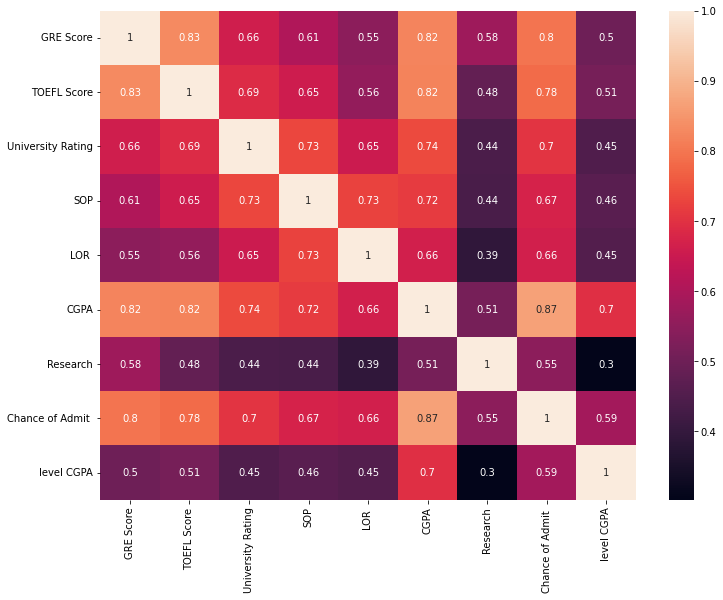

In [60]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Как видим наибольшую корреляцию с TOEFL Score даёт CGPA. Таким образом, мы будем строить однофакторную модель: зависимость TOEFL Score от CGPA.

# Splitting

In [62]:
X = df.iloc[:, [True,False,True,True,True,True,True,True,True]]
y = df['TOEFL Score']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X

,GRE Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,level CGPA
0,337,4,4.5,4.5,2.266958,1,0.92,1
1,324,4,4.0,4.5,2.182675,1,0.76,1
2,316,3,3.0,3.5,2.079442,1,0.72,0
3,322,3,3.5,2.5,2.159869,1,0.80,1
4,314,2,2.0,3.0,2.105353,0,0.65,1
...,...,...,...,...,...,...,...,...
391,324,3,3.5,3.5,2.201659,1,0.82,1
392,325,3,3.0,3.5,2.209373,1,0.84,1
393,330,4,5.0,4.5,2.246015,1,0.91,1
394,312,3,3.5,4.0,2.172476,0,0.67,1


# Simple Linear Regression

In [63]:
f1 = ['CGPA']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

sr.coef_, sr.intercept_

(array([0.66193057]), 3.251377115372812)

Т.е. TOEFL Score=0.66*CGPA+3.251

In [64]:
y_pred = sr.predict(X_test[f1])

sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.674, 0.63)

Таким образом TOEFL Score зависит от теста CGPA на 67%

In [65]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.03, 0.03)

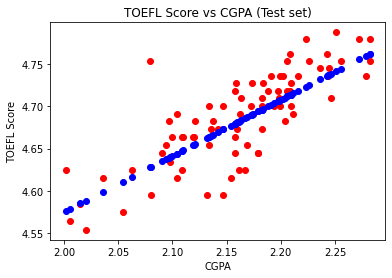

In [66]:
# Visualising the Test set results
plt.scatter(X_test['CGPA'], y_test, color = 'red')
plt.plot(X_test['CGPA'], sr.predict(X_test[f1]), 'bo')
plt.title('TOEFL Score vs CGPA (Test set)')
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')
plt.show()

# Multiple Linear Regression

In [67]:
#!pip install statsmodels

In [68]:
mr = LinearRegression().fit(X_train, y_train)
mr.score(X_train, y_train).round(3)

0.761

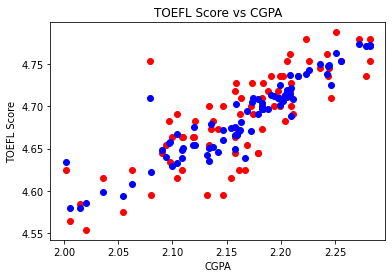

In [69]:
plt.scatter(X_test['CGPA'], y_test, color = 'red')
plt.plot(X_test['CGPA'], mr.predict(X_test), 'bo')
plt.title('TOEFL Score vs CGPA')
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')
plt.show()

In [70]:
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOEFL Score   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     122.2
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.05e-90
Time:                        22:06:27   Log-Likelihood:                 690.83
No. Observations:                 316   AIC:                            -1364.
Df Residuals:                     307   BIC:                            -1330.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 3.4510      0.110     31.237      0.000       3.234       3.668
GRE Score             0.0021      0.000      7.801      0.000       0.002       0.003
University Rating     0.0053      0.002      2.280      0.023       0.001       0.010
SOP                   0.0043      0.003      1.646      0.101      -0.001       0.010
LOR                  -0.0053      0.003     -1.974      0.049      -0.011   -1.56e-05
CGPA                  0.2375      0.063      3.757      0.000       0.113       0.362
Research             -0.0033      0.004     -0.827      0.409      -0.011       0.005
Chance of Admit       0.0610      0.024      2.493      0.013       0.013       0.109
level CGPA           -0.0046      0.006     -0.814      0.416      -0.016       0.007
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.429
Skew:                          -0.134   Prob(JB):                        0.180
Kurtosis:                       3.434   Cond. No.                     2.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Переменная Research и level CGPA не являются статистически значими по сравнению с остальными переменными

In [71]:
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)
pr = LinearRegression().fit(X_train_p, y_train)
pr.coef_, pr.intercept_

(array([ 2.59217612e-09, -2.69683900e-02,  1.31947240e-01,  1.48686564e-02,
        -2.14796042e-01,  8.64262649e+00, -1.81502435e-01, -6.94901798e-02,
        -3.00187278e-01,  2.63997690e-05,  8.11179122e-06, -1.05936314e-04,
        -2.97933471e-04,  7.39219496e-03, -7.84686010e-05, -2.97883977e-03,
         5.67932961e-05,  2.62265363e-03, -7.45095228e-05, -2.42428158e-03,
        -5.42883514e-02,  6.78348829e-03, -4.41666999e-02,  8.22334276e-03,
        -4.67729377e-03, -6.07999617e-05,  2.18396965e-02,  7.34721026e-03,
         1.32598774e-02, -1.01856997e-02, -7.58871004e-04,  1.46885984e-01,
        -1.79614622e-02,  1.95104079e-02, -2.29835638e-03, -2.75179015e+00,
         2.23596641e-01,  2.75001296e-01,  3.09053408e-01, -1.81502435e-01,
        -7.61860423e-02, -2.69902026e-02,  4.58553544e-01, -6.90818303e-02,
        -3.00187278e-01]),
 -0.36658714826860184)

In [72]:
y_pred = pr.predict(X_test_p)
pr.score(X_train_p, y_train).round(3)

0.791

In [73]:
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(0.03, 0.03)

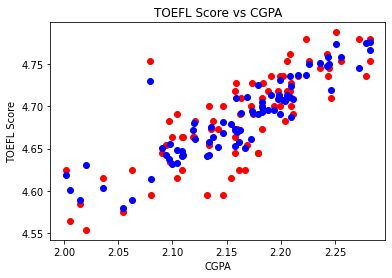

In [74]:
plt.scatter(X_test['CGPA'], y_test, color = 'red')
plt.plot(X_test['CGPA'], pr.predict(X_test_p), 'bo')
plt.title('TOEFL Score vs CGPA')
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')
plt.show()

# Pickle

In [75]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()